README
1. Upload 'test.zip' folder (test folder must have the four classes defined as subfolders) into /content directory
2. Upload 'model.pth' file to /content folder 
3. run all cells (Runtime-> run all)

In [37]:
from google.colab import drive
import zipfile
import os
drive.mount('/content/drive')
zip_ref = zipfile.ZipFile("/content/test.zip", 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report
import random
random.seed(2)
# PyTorch
import torch 
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets
from torchvision import models
from torch.optim import Adam
import torch.nn.functional as F
from torch import nn

#Ideally have the same version numbers or similar
!python --version #3.7.13
print(torch.__version__) # 1.11.0+cu113
print(np.__version__) # 1.21.6
print(sklearn.__version__) # 1.0.2

Python 3.7.13
1.11.0+cu113
1.21.6
1.0.2


In [39]:
# initialize datasetm
dataset = r"/tmp/test"

In [40]:
BATCH_SIZE = 32

def get_test_data():
    SIZE = (32,32)
    test_dir = '/tmp/test'
   
    transform = transforms.Compose([transforms.Resize(SIZE),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                    ])

    test_set = datasets.ImageFolder(test_dir, transform=transform)

    testLoader = DataLoader(test_set, batch_size=BATCH_SIZE, shuffle=True)

    return testLoader

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [41]:
class NN(nn.Module):
    def __init__(self):
        super().__init__()
        # define the layers using available Pytorch functions
        self.conv1 = nn.Conv2d(3, 32, 5)              # first conv2d 
        self.conv2 = nn.Conv2d(32, 64, 5)             # second conv2d
        self.max_pool = nn.MaxPool2d(2, 2)            # max pool 
        self.avg_pool = nn.AvgPool2d(2, 2)            # average pool
        self.linear1 = nn.Linear(64 * 5 * 5, 120)     # linear 1
        self.linear2 = nn.Linear(120, 90)             # linear 2
        self.linear3 = nn.Linear(90, 16)              # linear 3

    def forward(self, x):
        # calculations using previously defined Pytorch functions
        x = self.conv1(x)                             # conv1 (conv2d) + activation fn + max pool
        x = F.relu(x)                                 # built in relu activation fn
        x = self.max_pool(x)

        x = self.conv2(x)                             # conv2 (conv2d) + activation fn + avg pool
        x = F.relu(x)
        x = self.avg_pool(x)

        x = torch.flatten(x, 1)                       # flatten before linear layers

        x = self.linear1(x)                           # linear 1 + activation fn
        x = F.relu(x)

        x = self.linear2(x)                           # linear 2 + activation fn
        x = F.relu(x)

        x = self.linear3(x)                           # final layer (linear 3)
        return x

In [42]:
net = NN()
net.load_state_dict(torch.load('/content/model.pth'))

<All keys matched successfully>

## Model Evaluation

In [43]:
classes = classes = ('Cloth Mask', 'N95 Mask', 'No Mask', 'Surgical Mask')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

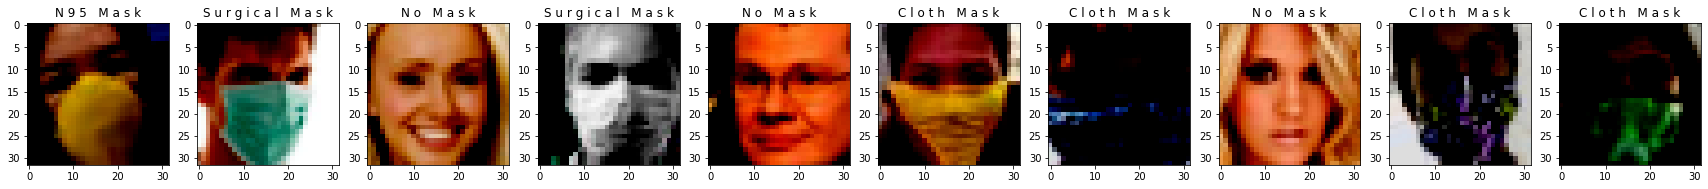

In [44]:
# get test data with actual label
dataTestiter = iter(get_test_data())
images, labels = dataTestiter.next()

fig, axes = plt.subplots(figsize=(30, 30), ncols=10)

for i in range(10):
      ax = axes[i]
      ax.imshow(images[i].permute(1, 2, 0)) 
      ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
plt.show()


In [45]:
predictions = net(images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

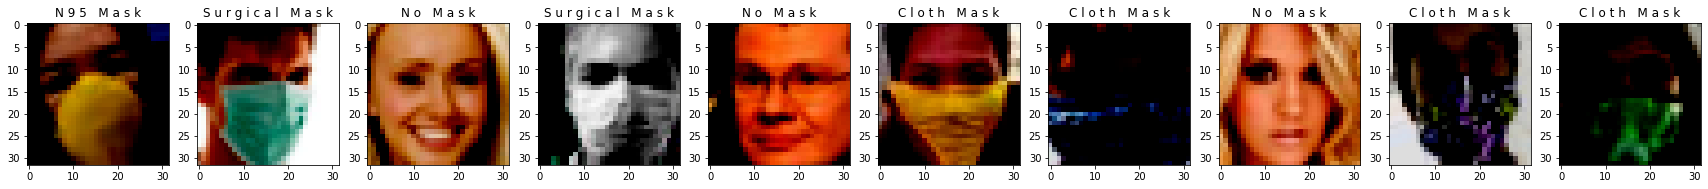

In [46]:
# predicted label
_, predicted = torch.max(predictions, 1)


fig, axes = plt.subplots(figsize=(30, 30), ncols=10)
for j in range(10):
      ax = axes[j]
      ax.imshow(images[j].permute(1, 2, 0)) 
      ax.title.set_text(' '.join('%5s' % classes[predicted[j]]))
plt.show()

In [51]:
correct = 0
total = 0
sum = 0

with torch.no_grad():
    for data in get_test_data():
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        images, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        sum+= 1

print(f'Accuracy of the network on the {sum*BATCH_SIZE} test images: {100 * correct // total} %')

Accuracy of the network on the 640 test images: 92 %


In [48]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in get_test_data():
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: Cloth Mask is 91.4 %
Accuracy for class: N95 Mask is 85.1 %
Accuracy for class: No Mask is 98.5 %
Accuracy for class: Surgical Mask is 88.1 %


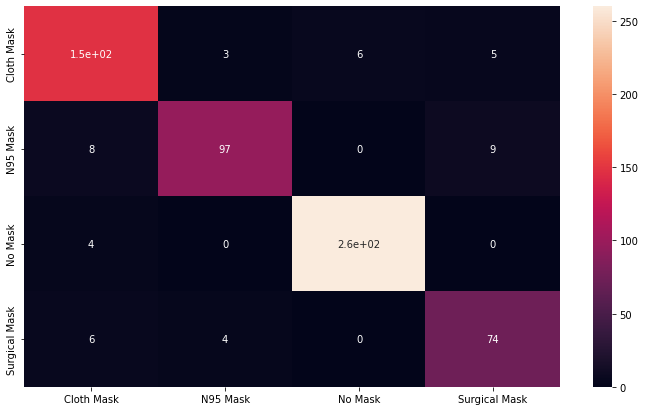

In [49]:
# confusion matrix
y_pred = []
y_true = []

# iterate over test data
for images, labels in get_test_data():
        output = net(images) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth


# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix,
                     index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sns.heatmap(df_cm, annot=True)


# build classification report
classification_report = classification_report(y_true,
                                   y_pred,
                                   target_names=classes,
                                   output_dict=True)

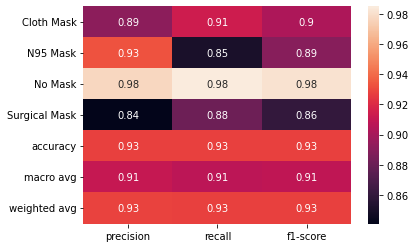

In [50]:
# classification heatmap
sns.heatmap(pd.DataFrame(classification_report).iloc[:-1, :].T, annot=True)